In [3]:
%pip install geopandas shapely



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import json
%matplotlib inline


In [9]:
resale_data = pd.read_csv('Data/resale_price_2017_onwards.csv')
resale_data['address'] = resale_data['block'] + ' ' + resale_data['street_name']
resale_data.head()


month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price                address  
0      232000.0  406 ANG MO KIO AVE 10  
1      250000.0   108 ANG MO KIO AVE 4  
2      262000.0   602 ANG MO KIO AVE 5  
3      265000.0  465 ANG MO KIO AVE 10  
4      265000.0   601 ANG MO KIO AVE 5

In [21]:
resale_data.shape


(170233, 12)

In [25]:
resale_data.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
address                0
dtype: int64

In [14]:
resale_location = pd.read_excel('Data/resale_locations.xlsx', engine='openpyxl')
resale_location.head()


address  latitude   longitude  postal_code
0  406 ANG MO KIO AVE 10  1.362005  103.853880       560406
1   108 ANG MO KIO AVE 4  1.370966  103.838202       560108
2   602 ANG MO KIO AVE 5  1.380709  103.835368       560602
3  465 ANG MO KIO AVE 10  1.366201  103.857201       560465
4   601 ANG MO KIO AVE 5  1.381041  103.835132       560601

In [27]:
resale_location.shape


(9511, 4)

In [26]:
resale_location.isnull().sum()


address        0
latitude       0
longitude      0
postal_code    0
dtype: int64

In [15]:
resale_merged_data = resale_data.merge(resale_location, how='inner', on='address')
resale_merged_data.head()


month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-05  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
2  2018-03  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     01 TO 03   
3  2018-03  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     01 TO 03   
4  2018-05  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
0            44.0   Improved                 1979  61 years 04 months   
1            44.0   Improved                 1979   61 years 01 month   
2            44.0   Improved                 1979  60 years 02 months   
3            44.0   Improved                 1979  60 years 02 months   
4            44.0   Improved                 1979   60 years 01 month   

   resale_price                address  latitude  longitude  postal_code  
0      232000.0  406 ANG MO KIO AVE 10  1.362005  103.85388       560406  
1      235000.0  406 ANG MO KIO AVE 10  1.362005  103.85388       560406  
2      202000.0  406 ANG MO KIO AVE 10  1.362005  103.85388       560406  
3      210000.0  406 ANG MO KIO AVE 10  1.362005  103.85388       560406  
4      220000.0  406 ANG MO KIO AVE 10  1.362005  103.85388       560406

In [158]:
resale_merged_data['town'].nunique()


26

In [28]:
resale_merged_data.shape


(170205, 15)

In [29]:
resale_merged_data.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
address                0
latitude               0
longitude              0
postal_code            0
dtype: int64

In [17]:
resale_4_room = resale_merged_data[resale_merged_data['flat_type']=='4 ROOM']
resale_4_room.head()


month        town flat_type block       street_name storey_range  \
24  2019-12  ANG MO KIO    4 ROOM   108  ANG MO KIO AVE 4     04 TO 06   
26  2020-07  ANG MO KIO    4 ROOM   108  ANG MO KIO AVE 4     10 TO 12   
32  2021-06  ANG MO KIO    4 ROOM   108  ANG MO KIO AVE 4     07 TO 09   
54  2022-09  ANG MO KIO    4 ROOM   602  ANG MO KIO AVE 5     01 TO 03   
55  2022-10  ANG MO KIO    4 ROOM   602  ANG MO KIO AVE 5     07 TO 09   

    floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
24            83.0  New Generation                 1978  57 years 09 months   
26            92.0  New Generation                 1978   57 years 01 month   
32            83.0  New Generation                 1978  56 years 03 months   
54            91.0  New Generation                 1980  56 years 10 months   
55            91.0  New Generation                 1980  56 years 09 months   

    resale_price               address  latitude   longitude  postal_code  
24      280000.0  108 ANG MO KIO AVE 4  1.370966  103.838202       560108  
26      408000.0  108 ANG MO KIO AVE 4  1.370966  103.838202       560108  
32      398000.0  108 ANG MO KIO AVE 4  1.370966  103.838202       560108  
54      450000.0  602 ANG MO KIO AVE 5  1.380709  103.835368       560602  
55      482000.0  602 ANG MO KIO AVE 5  1.380709  103.835368       560602

In [89]:
resale_4_room_2017 = resale_4_room[resale_4_room['month'].str.contains('2017')]
resale_4_room_2017.head()


month        town flat_type block        street_name storey_range  \
92   2017-01  ANG MO KIO    4 ROOM   601   ANG MO KIO AVE 5     04 TO 06   
344  2017-12  ANG MO KIO    4 ROOM   570   ANG MO KIO AVE 3     07 TO 09   
445  2017-06  ANG MO KIO    4 ROOM   119   ANG MO KIO AVE 3     07 TO 09   
496  2017-03  ANG MO KIO    4 ROOM   432  ANG MO KIO AVE 10     01 TO 03   
541  2017-10  ANG MO KIO    4 ROOM   584   ANG MO KIO AVE 3     04 TO 06   

     floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
92             91.0  New Generation                 1980  62 years 05 months   
344            92.0  New Generation                 1979  60 years 06 months   
445            92.0  New Generation                 1978  60 years 04 months   
496            92.0  New Generation                 1979  60 years 10 months   
541            91.0  New Generation                 1979  60 years 08 months   

     resale_price                address  latitude   longitude  postal_code  
92       435000.0   601 ANG MO KIO AVE 5  1.381041  103.835132       560601  
344      400000.0   570 ANG MO KIO AVE 3  1.369744  103.856023       560570  
445      458000.0   119 ANG MO KIO AVE 3  1.369563  103.844699       560119  
496      398000.0  432 ANG MO KIO AVE 10  1.368310  103.853600       560432  
541      468000.0   584 ANG MO KIO AVE 3  1.370713  103.853498       560584

In [134]:
resale_4_room_2017[resale_4_room_2017['town']=='CENTRAL AREA']


month          town flat_type block     street_name storey_range  \
5998    2017-03  CENTRAL AREA    4 ROOM   640       ROWELL RD     10 TO 12   
6102    2017-01  CENTRAL AREA    4 ROOM   232         BAIN ST     16 TO 18   
6103    2017-04  CENTRAL AREA    4 ROOM   232         BAIN ST     10 TO 12   
6104    2017-06  CENTRAL AREA    4 ROOM   232         BAIN ST     22 TO 24   
6105    2017-07  CENTRAL AREA    4 ROOM   232         BAIN ST     16 TO 18   
...         ...           ...       ...   ...             ...          ...   
108827  2017-08  CENTRAL AREA    4 ROOM   639       ROWELL RD     13 TO 15   
108828  2017-11  CENTRAL AREA    4 ROOM   639       ROWELL RD     13 TO 15   
115172  2017-09  CENTRAL AREA    4 ROOM     7  TG PAGAR PLAZA     04 TO 06   
115173  2017-11  CENTRAL AREA    4 ROOM     7  TG PAGAR PLAZA     04 TO 06   
122524  2017-11  CENTRAL AREA    4 ROOM    26      JLN BERSEH     13 TO 15   

        floor_area_sqm flat_model  lease_commence_date     remaining_lease  \
5998             115.0    Model A                 1984  66 years 03 months   
6102              82.0   Improved                 1980  62 years 04 months   
6103              82.0   Improved                 1980   62 years 01 month   
6104              82.0   Improved                 1980  61 years 11 months   
6105              82.0   Improved                 1980  61 years 10 months   
...                ...        ...                  ...                 ...   
108827           109.0    Model A                 1983  65 years 02 months   
108828           109.0    Model A                 1983  64 years 11 months   
115172            83.0   Improved                 1980  61 years 08 months   
115173            83.0   Improved                 1980  61 years 06 months   
122524            87.0   Improved                 1979  60 years 07 months   

        resale_price           address  latitude   longitude  postal_code  
5998        630000.0     640 ROWELL RD  1.307435  103.854714       200640  
6102        685000.0       232 BAIN ST  1.296853  103.853347       180232  
6103        640000.0       232 BAIN ST  1.296853  103.853347       180232  
6104        640000.0       232 BAIN ST  1.296853  103.853347       180232  
6105        655000.0       232 BAIN ST  1.296853  103.853347       180232  
...              ...               ...       ...         ...          ...  
108827      600000.0     639 ROWELL RD  1.307751  103.855204       200639  
108828      620000.0     639 ROWELL RD  1.307751  103.855204       200639  
115172      620000.0  7 TG PAGAR PLAZA  1.276954  103.843154        81007  
115173      668000.0  7 TG PAGAR PLAZA  1.276954  103.843154        81007  
122524      518000.0     26 JLN BERSEH  1.306164  103.857777       200026  

[71 rows x 15 columns]

In [87]:
resale_4_room.shape


(71710, 15)

In [88]:
resale_4_room_2017.shape


(8604, 15)

In [20]:
resale_merged_data['flat_type'].nunique()


7

In [30]:
resale_4_room.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
address                0
latitude               0
longitude              0
postal_code            0
dtype: int64

In [31]:
resale_4_room.dtypes


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
address                 object
latitude               float64
longitude              float64
postal_code              int64
dtype: object

In [96]:
resale_4_room_2017_avg_price = resale_4_room_2017.groupby('town', as_index=False).agg(average_resale_price = ('resale_price', 'mean'))
resale_4_room_2017_avg_price['average_resale_price'] = resale_4_room_2017_avg_price['average_resale_price'].apply(lambda x: round(x))
resale_4_room_2017_avg_price.head()


town  average_resale_price
0   ANG MO KIO                494596
1        BEDOK                443213
2       BISHAN                574539
3  BUKIT BATOK                397496
4  BUKIT MERAH                653573

In [153]:
resale_4_room_2017_avg_price['town']


0          ANG MO KIO
1               BEDOK
2              BISHAN
3         BUKIT BATOK
4         BUKIT MERAH
5       BUKIT PANJANG
6         BUKIT TIMAH
7        CENTRAL AREA
8       CHOA CHU KANG
9            CLEMENTI
10            GEYLANG
11            HOUGANG
12        JURONG EAST
13        JURONG WEST
14    KALLANG/WHAMPOA
15      MARINE PARADE
16          PASIR RIS
17            PUNGGOL
18         QUEENSTOWN
19          SEMBAWANG
20           SENGKANG
21          SERANGOON
22           TAMPINES
23          TOA PAYOH
24          WOODLANDS
25             YISHUN
Name: town, dtype: object

In [100]:
df_places = gpd.read_file('./shp_file/masterplan_area_boundary.shp')


In [101]:
df_places.head()


OBJECTID   PLN_AREA_N PLN_AREA_C CA_IND           REGION_N REGION_C  \
0         1   ANG MO KIO         AM      N  NORTH-EAST REGION      NER   
1         2        BEDOK         BD      N        EAST REGION       ER   
2         3       BISHAN         BS      N     CENTRAL REGION       CR   
3         4     BOON LAY         BL      N        WEST REGION       WR   
4         5  BUKIT BATOK         BK      N        WEST REGION       WR   

            INC_CRC  FMEL_UPD_D      X_ADDR      Y_ADDR    SHAPE_Leng  \
0  E5CBDDE0C2113055  2016-05-11  28976.8763  40229.1238  17494.240190   
1  1719251260799DF6  2016-05-11  38582.6650  34032.0961  21872.798962   
2  BA616285F402846F  2016-05-11  28789.7630  37450.8865  13517.121556   
3  A3DC87118B43CDED  2016-05-11  13410.3824  33008.9884  18528.467448   
4  FB44C870B04B7F57  2016-05-11  19255.4150  37527.6527  15234.223423   

     SHAPE_Area                                           geometry  
0  1.394138e+07  POLYGON ((30658.500 42047.527, 30679.195 42020...  
1  2.173319e+07  POLYGON ((38974.269 36138.243, 39371.471 35747...  
2  7.618921e+06  POLYGON ((29772.191 38311.805, 29784.826 38304...  
3  8.279408e+06  POLYGON ((12861.383 32207.492, 12860.555 32208...  
4  1.113326e+07  POLYGON ((20294.455 39114.528, 20334.318 39054...

In [151]:
pd.set_option('display.max_columns', None)
df_places['PLN_AREA_N']


0                  ANG MO KIO
1                       BEDOK
2                      BISHAN
3                    BOON LAY
4                 BUKIT BATOK
5                 BUKIT MERAH
6               BUKIT PANJANG
7                 BUKIT TIMAH
8                     GEYLANG
9                     KALLANG
10                     NOVENA
11                  PASIR RIS
12                    HOUGANG
13                JURONG EAST
14               LIM CHU KANG
15                     MANDAI
16              MARINE PARADE
17      NORTH-EASTERN ISLANDS
18                    PIONEER
19                JURONG WEST
20                 PAYA LEBAR
21                    PUNGGOL
22                 QUEENSTOWN
23                    SELETAR
24                  SEMBAWANG
25                   SENGKANG
26                  SERANGOON
27    CENTRAL WATER CATCHMENT
28                     CHANGI
29               SUNGEI KADUT
30                   TAMPINES
31              DOWNTOWN CORE
32                    TANGLIN
33        

In [102]:
df_places = df_places.merge(resale_4_room_2017_avg_price, how='outer', left_on='PLN_AREA_N', right_on='town')


In [106]:
df_places['town'] = df_places['PLN_AREA_N']


In [ ]:
df_places['']


In [107]:
df_places.head()


OBJECTID   PLN_AREA_N PLN_AREA_C CA_IND           REGION_N REGION_C  \
0       1.0   ANG MO KIO         AM      N  NORTH-EAST REGION      NER   
1       2.0        BEDOK         BD      N        EAST REGION       ER   
2       3.0       BISHAN         BS      N     CENTRAL REGION       CR   
3       4.0     BOON LAY         BL      N        WEST REGION       WR   
4       5.0  BUKIT BATOK         BK      N        WEST REGION       WR   

            INC_CRC  FMEL_UPD_D      X_ADDR      Y_ADDR    SHAPE_Leng  \
0  E5CBDDE0C2113055  2016-05-11  28976.8763  40229.1238  17494.240190   
1  1719251260799DF6  2016-05-11  38582.6650  34032.0961  21872.798962   
2  BA616285F402846F  2016-05-11  28789.7630  37450.8865  13517.121556   
3  A3DC87118B43CDED  2016-05-11  13410.3824  33008.9884  18528.467448   
4  FB44C870B04B7F57  2016-05-11  19255.4150  37527.6527  15234.223423   

     SHAPE_Area                                           geometry  \
0  1.394138e+07  POLYGON ((30658.500 42047.527, 30679.195 42020...   
1  2.173319e+07  POLYGON ((38974.269 36138.243, 39371.471 35747...   
2  7.618921e+06  POLYGON ((29772.191 38311.805, 29784.826 38304...   
3  8.279408e+06  POLYGON ((12861.383 32207.492, 12860.555 32208...   
4  1.113326e+07  POLYGON ((20294.455 39114.528, 20334.318 39054...   

          town  average_resale_price  
0   ANG MO KIO              494596.0  
1        BEDOK              443213.0  
2       BISHAN              574539.0  
3     BOON LAY                   NaN  
4  BUKIT BATOK              397496.0

In [75]:
df_places.to_file('myJson.geojson', driver='GeoJSON')


<Axes: >

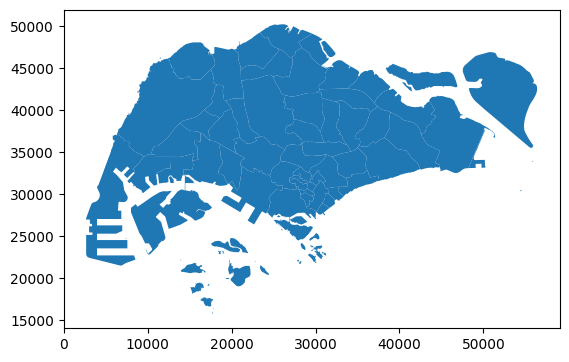

In [104]:
df_places.plot()


<Axes: >

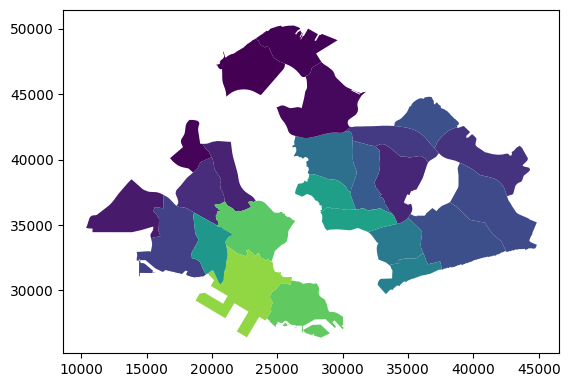

In [108]:
df_places.plot(column='average_resale_price')


In [189]:
sg = json.load(open('./myJson.geojson', 'r'))


In [113]:
sg['features'][1]


{'type': 'Feature',
 'properties': {'OBJECTID': 2,
  'PLN_AREA_N': 'BEDOK',
  'PLN_AREA_C': 'BD',
  'CA_IND': 'N',
  'REGION_N': 'EAST REGION',
  'REGION_C': 'ER',
  'INC_CRC': '1719251260799DF6',
  'FMEL_UPD_D': '2016-05-11',
  'X_ADDR': 38582.665,
  'Y_ADDR': 34032.0961,
  'SHAPE_Leng': 21872.7989616,
  'SHAPE_Area': 21733187.7807},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[38974.26939999964, 36138.243300000206],
    [39371.47080000024, 35747.455000000075],
    [39390.54600000009, 35728.2592999991],
    [39630.06520000007, 35493.3554999996],
    [39640.387000000104, 35481.60579999909],
    [39686.71669999976, 35436.04289999977],
    [39698.05420000013, 35425.737999999896],
    [39703.21729999967, 35421.69070000015],
    [39709.81819999963, 35416.5111999996],
    [39715.822399999946, 35412.46959999949],
    [39722.21569999959, 35408.164899999276],
    [39735.18499999959, 35400.73939999938],
    [39748.65730000008, 35394.27920000069],
    [39762.5708999997, 35388.8105999995]

In [115]:
sg['features'][0]['properties']


{'OBJECTID': 1,
 'PLN_AREA_N': 'ANG MO KIO',
 'PLN_AREA_C': 'AM',
 'CA_IND': 'N',
 'REGION_N': 'NORTH-EAST REGION',
 'REGION_C': 'NER',
 'INC_CRC': 'E5CBDDE0C2113055',
 'FMEL_UPD_D': '2016-05-11',
 'X_ADDR': 28976.8763,
 'Y_ADDR': 40229.1238,
 'SHAPE_Leng': 17494.2401897,
 'SHAPE_Area': 13941379.9943}

In [160]:
central_area = ['SINGAPORE RIVER', 'ORCHARD', 'OUTRAM', 'RIVER VALLEY', 'ROCHOR', 'STRAITS VIEW', 'NEWTON', 'DOWNTOWN CORE', 'MARINA EAST', 'MARINA SOUTH', 'MUSEUM']


In [193]:
town_id_map = {}
for feature in sg['features']:
    #if feature['properties']['PLN_AREA_N'] in central_area:
    #    feature['properties']['PLN_AREA_N'] = 'CENTRAL AREA'
    if feature['properties']['PLN_AREA_N'] == 'KALLANG':
        feature['properties']['PLN_AREA_N'] = 'KALLANG/WHAMPOA'

for feature in sg['features']:
    feature["id"] = feature["properties"]["OBJECTID"]
    town_id_map[feature["properties"]["PLN_AREA_N"]] = feature["id"]


In [154]:
resale_4_room_2017_avg_price['town']


0          ANG MO KIO
1               BEDOK
2              BISHAN
3         BUKIT BATOK
4         BUKIT MERAH
5       BUKIT PANJANG
6         BUKIT TIMAH
7        CENTRAL AREA
8       CHOA CHU KANG
9            CLEMENTI
10            GEYLANG
11            HOUGANG
12        JURONG EAST
13        JURONG WEST
14    KALLANG/WHAMPOA
15      MARINE PARADE
16          PASIR RIS
17            PUNGGOL
18         QUEENSTOWN
19          SEMBAWANG
20           SENGKANG
21          SERANGOON
22           TAMPINES
23          TOA PAYOH
24          WOODLANDS
25             YISHUN
Name: town, dtype: object

In [194]:
town_id_map


{'ANG MO KIO': 1,
 'BEDOK': 2,
 'BISHAN': 3,
 'BOON LAY': 4,
 'BUKIT BATOK': 5,
 'BUKIT MERAH': 6,
 'BUKIT PANJANG': 7,
 'BUKIT TIMAH': 8,
 'GEYLANG': 9,
 'KALLANG/WHAMPOA': 10,
 'NOVENA': 11,
 'PASIR RIS': 12,
 'HOUGANG': 13,
 'JURONG EAST': 14,
 'LIM CHU KANG': 15,
 'MANDAI': 16,
 'MARINE PARADE': 17,
 'NORTH-EASTERN ISLANDS': 18,
 'PIONEER': 19,
 'JURONG WEST': 20,
 'PAYA LEBAR': 21,
 'PUNGGOL': 22,
 'QUEENSTOWN': 23,
 'SELETAR': 24,
 'SEMBAWANG': 25,
 'SENGKANG': 26,
 'SERANGOON': 27,
 'CENTRAL WATER CATCHMENT': 28,
 'CHANGI': 29,
 'SUNGEI KADUT': 30,
 'TAMPINES': 31,
 'DOWNTOWN CORE': 32,
 'TANGLIN': 33,
 'TENGAH': 34,
 'TOA PAYOH': 35,
 'MARINA EAST': 36,
 'WOODLANDS': 37,
 'MARINA SOUTH': 38,
 'MUSEUM': 39,
 'NEWTON': 40,
 'CHANGI BAY': 41,
 'CHOA CHU KANG': 42,
 'CLEMENTI': 43,
 'SINGAPORE RIVER': 44,
 'STRAITS VIEW': 45,
 'SIMPANG': 46,
 'SOUTHERN ISLANDS': 47,
 'TUAS': 48,
 'WESTERN ISLANDS': 49,
 'WESTERN WATER CATCHMENT': 50,
 'YISHUN': 51,
 'ORCHARD': 52,
 'OUTRAM': 53,
 '

In [195]:
town_id_map.keys()


dict_keys(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BOON LAY', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'GEYLANG', 'KALLANG/WHAMPOA', 'NOVENA', 'PASIR RIS', 'HOUGANG', 'JURONG EAST', 'LIM CHU KANG', 'MANDAI', 'MARINE PARADE', 'NORTH-EASTERN ISLANDS', 'PIONEER', 'JURONG WEST', 'PAYA LEBAR', 'PUNGGOL', 'QUEENSTOWN', 'SELETAR', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'CENTRAL WATER CATCHMENT', 'CHANGI', 'SUNGEI KADUT', 'TAMPINES', 'DOWNTOWN CORE', 'TANGLIN', 'TENGAH', 'TOA PAYOH', 'MARINA EAST', 'WOODLANDS', 'MARINA SOUTH', 'MUSEUM', 'NEWTON', 'CHANGI BAY', 'CHOA CHU KANG', 'CLEMENTI', 'SINGAPORE RIVER', 'STRAITS VIEW', 'SIMPANG', 'SOUTHERN ISLANDS', 'TUAS', 'WESTERN ISLANDS', 'WESTERN WATER CATCHMENT', 'YISHUN', 'ORCHARD', 'OUTRAM', 'RIVER VALLEY', 'ROCHOR'])

In [196]:
resale_4_room_2017_avg_price = resale_4_room_2017_avg_price[resale_4_room_2017_avg_price['town'] != 'CENTRAL AREA']


In [197]:
resale_4_room_2017_avg_price['id'] = resale_4_room_2017_avg_price['town'].apply(lambda x: town_id_map[x])


In [200]:
resale_4_room_2017_avg_price.head()


town  average_resale_price  id  scaled_average_resale_price
0   ANG MO KIO                494596   1                     5.694251
1        BEDOK                443213   2                     5.646612
2       BISHAN                574539   3                     5.759320
3  BUKIT BATOK                397496   5                     5.599333
4  BUKIT MERAH                653573   6                     5.815294

In [205]:
resale_4_room_2017_avg_price['id'] = resale_4_room_2017_avg_price['id'].astype('str')


In [206]:
resale_4_room_2017_avg_price.dtypes


town                            object
average_resale_price             int64
id                              object
scaled_average_resale_price    float64
dtype: object

In [124]:
import plotly.express as px


In [207]:
fig = px.choropleth(resale_4_room_2017_avg_price, geojson=sg, color='average_resale_price',
                           locations="id", scope='asia')
fig.show()
